# Parametric Density Estimation

In [110]:
import pandas as pd

In [111]:
import random

In [112]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [113]:
len(L)

10000

In [114]:
L[:5]

[7, 5, 3, 10, 5]

In [115]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [116]:
import numpy as np
np.cumsum(s)

2     0.0234
3     0.0771
4     0.1613
5     0.2704
6     0.4157
7     0.5793
8     0.7153
9     0.8342
10    0.9125
11    0.9693
12    1.0000
Name: count, dtype: float64

<Axes: >

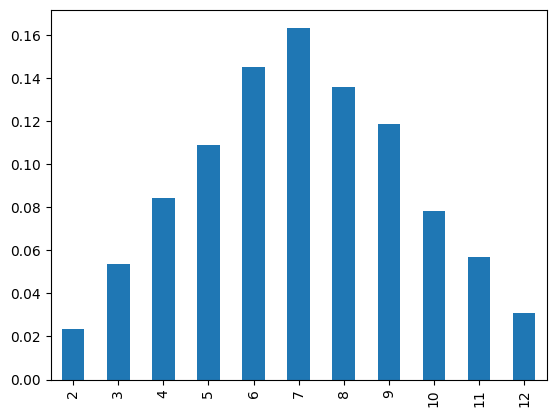

In [117]:
s.plot(kind='bar')

<Axes: >

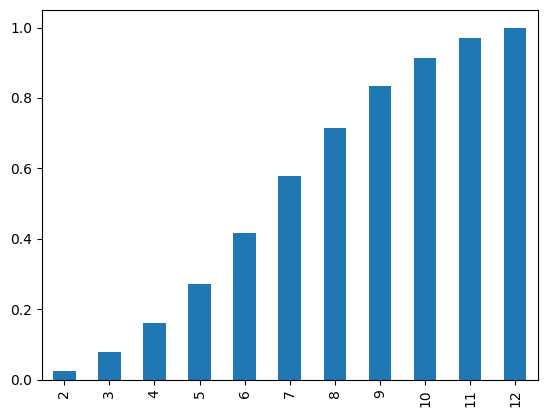

In [118]:
np.cumsum(s).plot(kind='bar')

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [120]:
sample.mean()

50.069738994988455

(array([  7.,  38., 107., 193., 236., 224., 144.,  39.,   8.,   4.]),
 array([35.26266651, 38.45984199, 41.65701748, 44.85419296, 48.05136844,
        51.24854392, 54.44571941, 57.64289489, 60.84007037, 64.03724585,
        67.23442133]),
 <BarContainer object of 10 artists>)

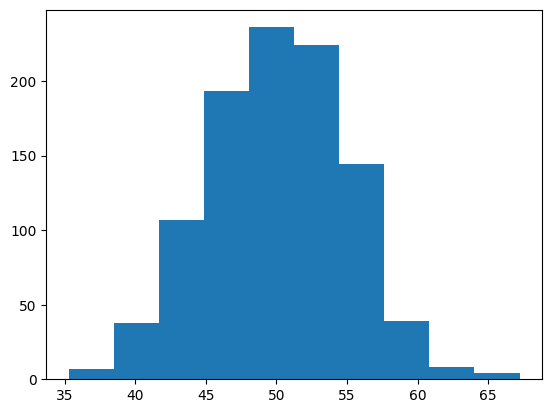

In [121]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [122]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [123]:
# fit the distribution with the above parameters
from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [124]:
values = np.linspace(sample.min(),sample.max(),100)

In [125]:
sample.max()

67.2344213346945

In [126]:
probabilities = [dist.pdf(value) for value in values]

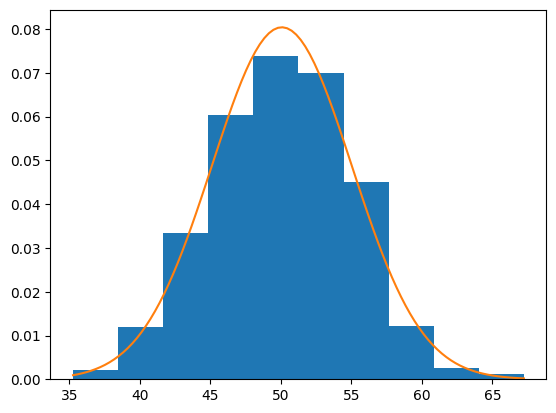

In [127]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

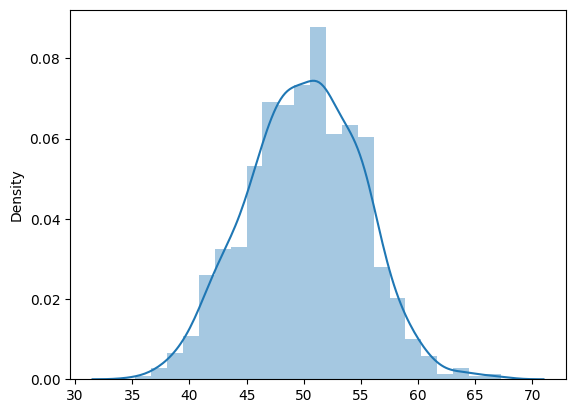

In [128]:
import seaborn as sns
sns.distplot(sample)

### KDE

In [129]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  1.,  5.,  8.,  5.,  4., 12., 15., 12., 22., 20., 18., 19.,
        22., 20., 18., 30., 25., 10., 14.,  9.,  4.,  8.,  8., 15., 18.,
        21., 33., 39., 37., 54., 58., 57., 48., 52., 41., 55., 39., 31.,
        30., 15., 13., 13.,  7.,  7.,  4.,  1.,  1.,  0.,  1.]),
 array([ 6.30317673,  7.31281294,  8.32244914,  9.33208535, 10.34172155,
        11.35135776, 12.36099397, 13.37063017, 14.38026638, 15.38990258,
        16.39953879, 17.40917499, 18.4188112 , 19.4284474 , 20.43808361,
        21.44771982, 22.45735602, 23.46699223, 24.47662843, 25.48626464,
        26.49590084, 27.50553705, 28.51517326, 29.52480946, 30.53444567,
        31.54408187, 32.55371808, 33.56335428, 34.57299049, 35.58262669,
        36.5922629 , 37.60189911, 38.61153531, 39.62117152, 40.63080772,
        41.64044393, 42.65008013, 43.65971634, 44.66935254, 45.67898875,
        46.68862496, 47.69826116, 48.70789737, 49.71753357, 50.72716978,
        51.73680598, 52.74644219, 53.75607839, 54.7657146 ,

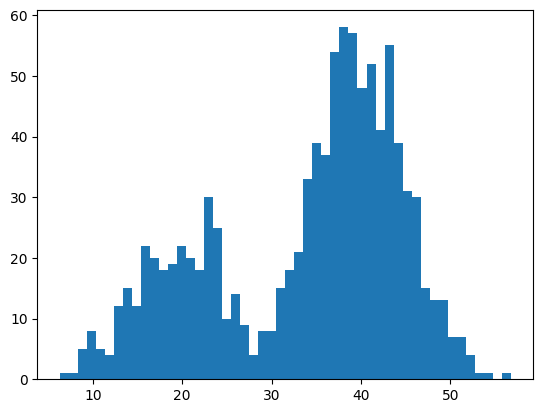

In [130]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [131]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [132]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [133]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

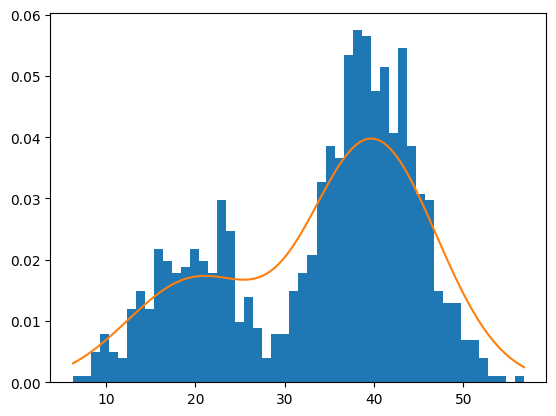

In [134]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

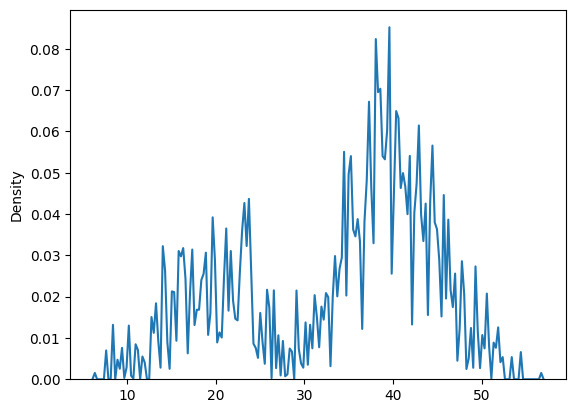

In [135]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [136]:
import seaborn as sns

In [137]:
df = sns.load_dataset('iris')

In [138]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

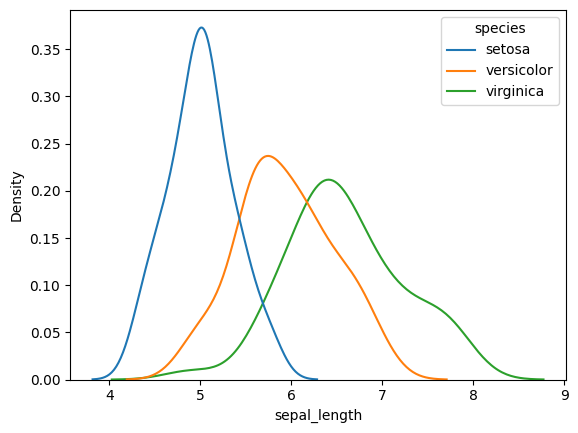

In [139]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

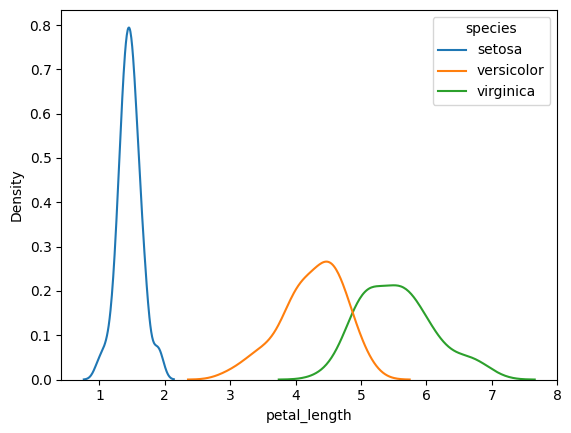

In [140]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

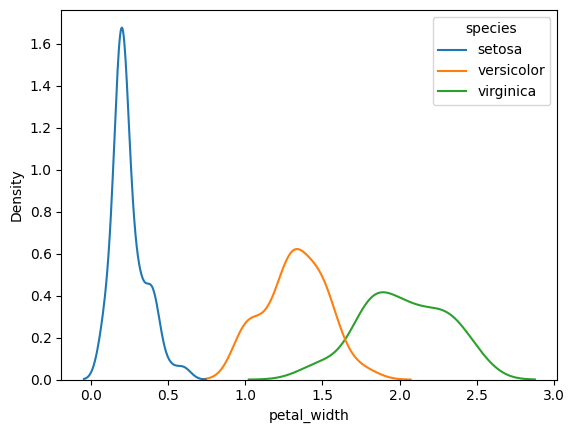

In [141]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

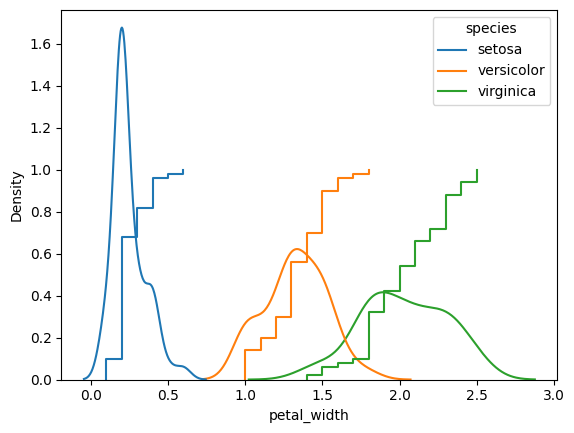

In [142]:
sns.kdeplot(data=df, x='petal_width', hue='species')
sns.ecdfplot(data=df, x='petal_width', hue='species')

In [143]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [144]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

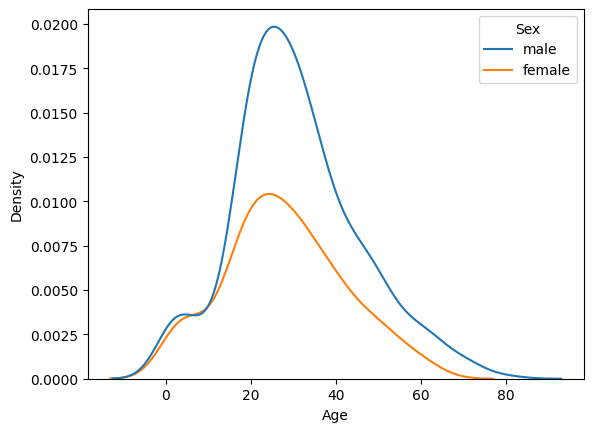

In [145]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

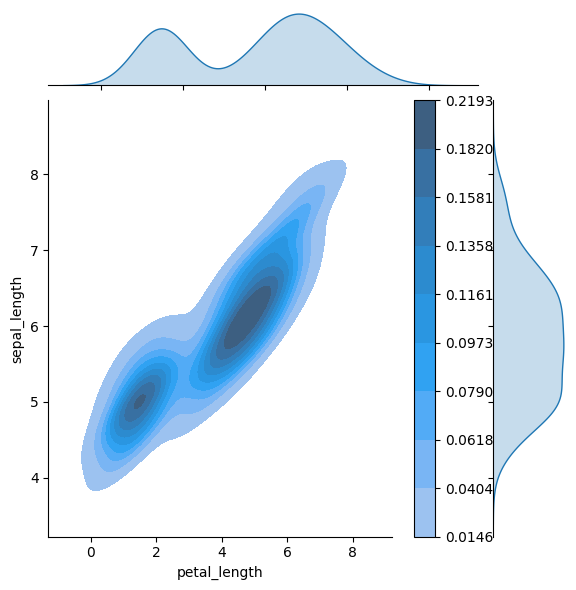

In [146]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

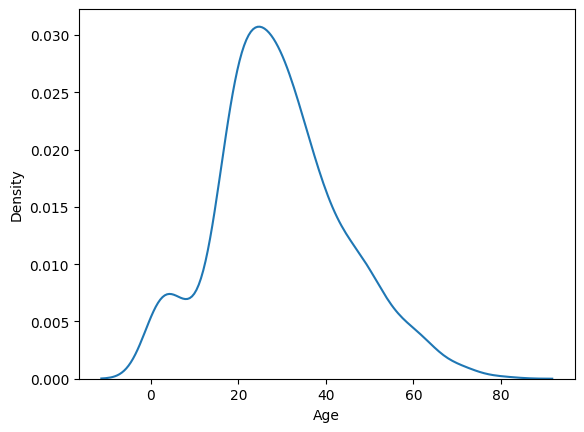

In [147]:
sns.kdeplot(titanic['Age'])

In [148]:
titanic['Age'].mean()

29.69911764705882

In [149]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

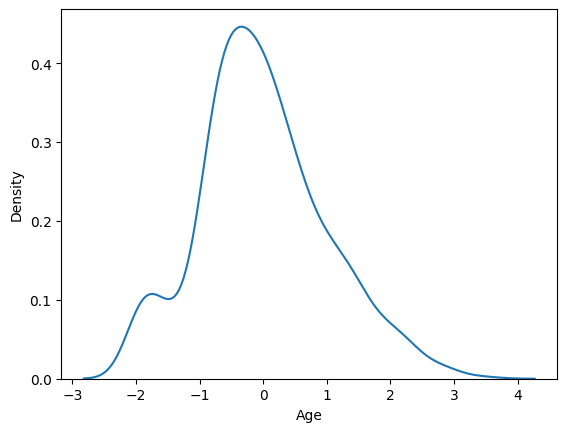

In [150]:
sns.kdeplot(x)

In [151]:
x.mean()

2.338621049070358e-16

In [152]:
x.std()

1.0

In [153]:
titanic['Age'].skew()

0.38910778230082704

In [154]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [155]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [156]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [157]:
titanic['Age'].max()

80.0